In [55]:
from IPython.display import Image
from IPython.core.display import HTML

Image(url="https://cdn-prod.medicalnewstoday.com/content/images/articles/323/323465/drugs-and-addiction.jpg")

# ***Project 2: Personality vs Risk of Drug Use***

Sebastian and Laura

## Table of Content

1. Buisness Case
2. Importing relevant libraries
3. Data Preperation
4. Overview of data
5. Classification of drug usage in users and non-users
6. Categorizing the different drugs into 3 groups
7. Correlation Heatmap
8. Drug usage comparison in the UK and the USA
9. Distribution of personality traits depending on drug use
10. Drug users depending on level of Further Education
11. Drug users depending on Age
12. Further things to look into

## Buisiness Case

The stakeholder is an international drug dealer who sells his drugs, mainly party drugs, on the dark web.  
Before individuals can enter the webpage and explore the different product, they have to fill in a personality questionaire, on which certain personality scores can be based. The drug dealer wants a model to predict whether a person is likely to consume party drugs based on these scores as well as some personal information. Individuals who would not purchase anything will not be allowed to enter the website, as he wants to stop people, who aren't actually interested in purchasing drugs, to see the website and then report him.

## Importing relevant libraries

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None) # To display all columns
import xlrd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import seaborn as sns
sns.set_style("whitegrid")

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt


## Data Preperation

### Reading in Data

In [3]:
df = pd.read_excel('Data/drug_consumption.xls')

### Cleaning Data

Semeron is a fictional drug which was introduced to identify over clamimers. Therefore we deleted the response of individuals who indicated the use of Semeron as their replies cannot be trusted.
We then also deleted the column Semer.

In [4]:
df[df["Semer"] != "CL0"]

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,Semer,VSA
727,730,-0.07854,0.48246,-1.73790,-0.09765,-0.31685,-0.58016,0.32197,0.14143,-0.60633,0.12331,1.29221,0.76540,CL6,CL2,CL2,CL2,CL6,CL6,CL5,CL2,CL2,CL2,CL2,CL2,CL0,CL4,CL2,CL6,CL6,CL2,CL2
817,821,-0.95197,-0.48246,-0.61113,-0.09765,-0.50212,-0.67825,1.74091,0.72330,0.13136,0.41594,0.88113,1.92173,CL3,CL0,CL0,CL0,CL6,CL4,CL5,CL0,CL0,CL3,CL0,CL0,CL0,CL5,CL0,CL5,CL4,CL3,CL0
1516,1520,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,-0.80615,-1.27553,-1.34289,-1.92173,-0.71126,0.07987,CL0,CL2,CL3,CL2,CL3,CL4,CL1,CL3,CL2,CL1,CL2,CL1,CL2,CL1,CL2,CL4,CL2,CL3,CL1
1533,1537,-0.95197,0.48246,-0.61113,-0.57009,0.11440,-0.46725,0.80523,0.29338,2.03972,1.81175,-1.37983,-0.21575,CL5,CL6,CL0,CL4,CL6,CL3,CL6,CL4,CL0,CL4,CL0,CL4,CL3,CL2,CL0,CL3,CL4,CL4,CL3
1698,1702,0.49788,0.48246,0.45468,-0.57009,-0.31685,1.98437,-0.80615,2.15324,0.76096,-0.00665,1.29221,1.92173,CL6,CL0,CL0,CL3,CL5,CL6,CL4,CL2,CL0,CL2,CL0,CL2,CL2,CL2,CL0,CL2,CL6,CL2,CL0
1769,1773,-0.95197,-0.48246,-1.22751,-0.57009,-0.22166,-0.34799,1.28610,1.06238,-0.01729,-0.52745,0.52975,1.22470,CL4,CL3,CL0,CL3,CL6,CL6,CL6,CL0,CL0,CL3,CL0,CL4,CL3,CL6,CL3,CL3,CL3,CL1,CL3
1806,1810,-0.95197,0.48246,-1.43719,-0.57009,-0.31685,1.23461,1.11406,1.06238,-1.47955,0.12331,0.88113,1.92173,CL4,CL3,CL0,CL2,CL6,CL6,CL3,CL5,CL2,CL4,CL2,CL1,CL4,CL1,CL0,CL1,CL6,CL1,CL2
1823,1827,-0.95197,0.48246,0.45468,-0.57009,-0.31685,0.22393,-0.30033,0.88309,1.28610,-0.00665,0.88113,0.07987,CL4,CL0,CL0,CL2,CL5,CL6,CL5,CL2,CL0,CL0,CL0,CL0,CL2,CL3,CL0,CL3,CL5,CL2,CL0


In [5]:
df1 = df.drop(df.loc[df["Semer"] != "CL0"].index)

In [6]:
df1.drop('Semer', inplace=True, axis=1)

### Adding actual values for visualizations

We reassigned the "real" values for Gender, Country, Level of Education and Age to allow for better visualizations.

In [7]:
Gencat = df1['Gender'].apply(lambda x: 1 if x > 0 else 0)
df1["Gender"] = Gencat
df1["Gender"] = df1["Gender"].astype("category")

In [8]:
Countrycat = df1['Country'].apply(lambda x: {(-0.09765):'Australia', 
                                             0.24923:'Canada',
                                             0.96082:'UK',
                                            (-0.46841):'New Zealand',
                                            (-0.28519):'Other',
                                            (0.21128):'R.o.Ireland',
                                            (-0.57009):'USA'}.get(x,''))
df1.insert(5, "Country_Name", Countrycat)
df1["Country_Name"] = df1["Country_Name"].astype("category")

In [9]:
Educat = df1['Education'].apply(lambda x: {(-2.43591): "under 16y",
                                           (-1.73790): "16y",
                                           (-1.43719): "17y",
                                           (-1.22751): '18y',
                                           (-0.61113):'College/Uni',
                                           (-0.05921):'Cert./Diploma',
                                           (0.45468): 'Uni Degree', 
                                           (1.16365):'Master',
                                           (1.98437): 'PhD'}.get(x,''))
df1.insert(4, "Education_Level", Educat)
df1["Education_Level"] = df1["Education_Level"].astype("category")

In [10]:
Ethinicitycat = df1["Ethnicity"].apply(lambda x: {(-0.50212): "Asian",
                                           (-1.10702): "Black",
                                           (1.90725): "Mixed-Black/Asian",
                                           (0.12600): 'Mixed-White/Asian',
                                           (-0.22166):'Mixed-White/Black',
                                           (0.11440):'Other',
                                           (-0.31685): 'White'}.get(x,''))
df1.insert(8, "Ethnicity_Label", Ethinicitycat)
df1["Ethnicity_Label"] = df1["Ethnicity_Label"].astype("category")

In [11]:
Agecat = df1["Age"].apply(lambda x: {(-0.95197): "18-24",
                                           (-0.07854): "25-34",
                                           (0.49788): "35-44",
                                           (1.09449): '45-54',
                                           (1.82213):'55-64',
                                           (2.59171):'65+'}.get(x,''))
df1.insert(2, "Age_Cat", Agecat)
df1["Age_Cat"] = df1["Age_Cat"].astype("category")

## Getting an overview of the Data

### Overview of who particpated in this study

In [12]:
custom_palette_gender = ["navy", "indianred"]

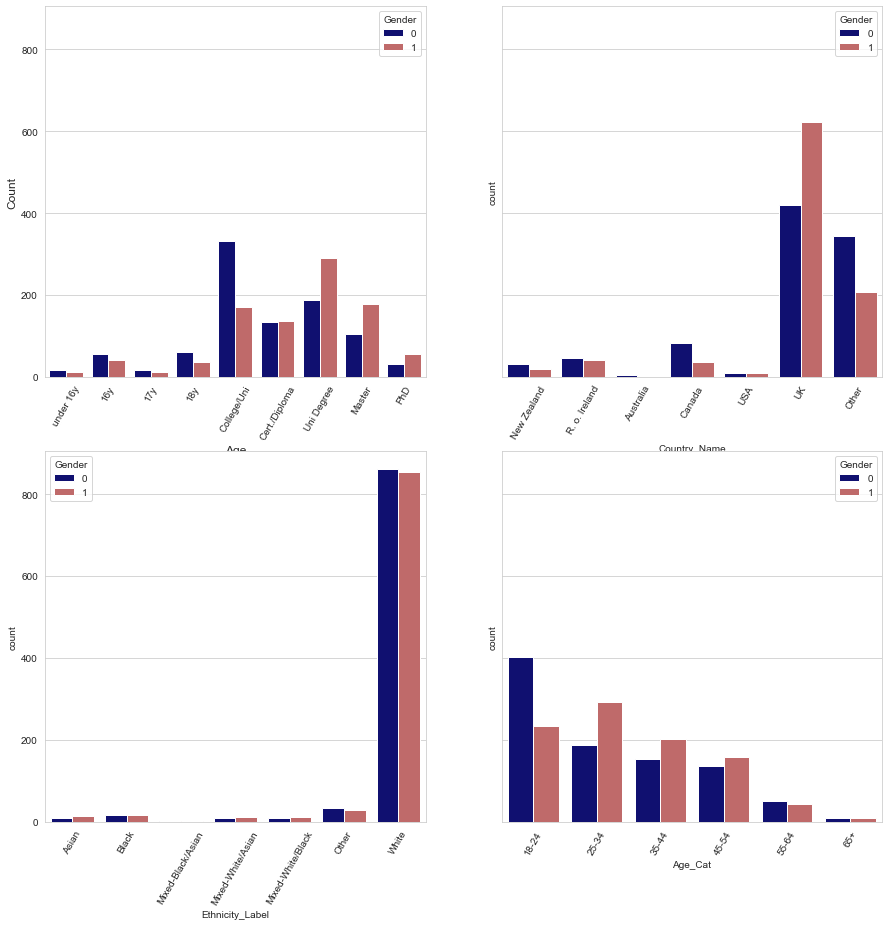

In [13]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(15, 15), sharey=True)

sns.set_palette(custom_palette_gender)

edu_order = ["under 16y", "16y", "17y", '18y', 'College/Uni', 'Cert./Diploma', 'Uni Degree', 'Master', 'PhD']
ethnicity_order = ["Asian", "Black", "Mixed-Black/Asian", "Mixed-White/Asian", "Mixed-White/Black", "Other", "White"]
age_order = ["18-24", "25-34", "35-44", '45-54', "55-64",'65+']
country_order = ["New Zealand", "R. o. Ireland", "Australia", "Canada", "USA", "UK", "Other"]

g = sns.countplot(data=df1, x="Education_Level", order = edu_order, hue='Gender', ax=axes[0][0])
g.set_xticklabels(edu_order, rotation=60, size = 10)
g.set_xlabel("Education Level",size=12)
g.set_ylabel("Count",size=12)

g1 = sns.countplot(data=df1, x="Country_Name", hue='Gender', ax=axes[0][1])
g1.set_xticklabels(country_order, rotation=60, size = 10)
g.set_xlabel("Country of current residence",size=12)
g.set_ylabel("Count",size=12)

g2 = sns.countplot(data=df1, x="Ethnicity_Label", hue='Gender', ax=axes[1][0])
g2.set_xticklabels(ethnicity_order, rotation=60, size = 10);
g.set_xlabel("Ethnicity",size=12)
g.set_ylabel("Count",size=12)

g3 = sns.countplot(data=df1, x="Age_Cat", hue='Gender', ax=axes[1][1])
g3.set_xticklabels(age_order, rotation=60, size = 10)
g.set_xlabel("Age",size=12)
g.set_ylabel("Count",size=12);

The plots above show that the respondants are not a very good representation of the general public. 
The respondants tend to have a high level of education, are mainly from the UK and US with the rest being from other english speaking countries (excpet 112 individuals where it is not known). On top of that the respondants are mainly ethnically white (91.25%) and are nor evenly split across the different age group catgories. 

***Slightly adjusted figure for presentation:***

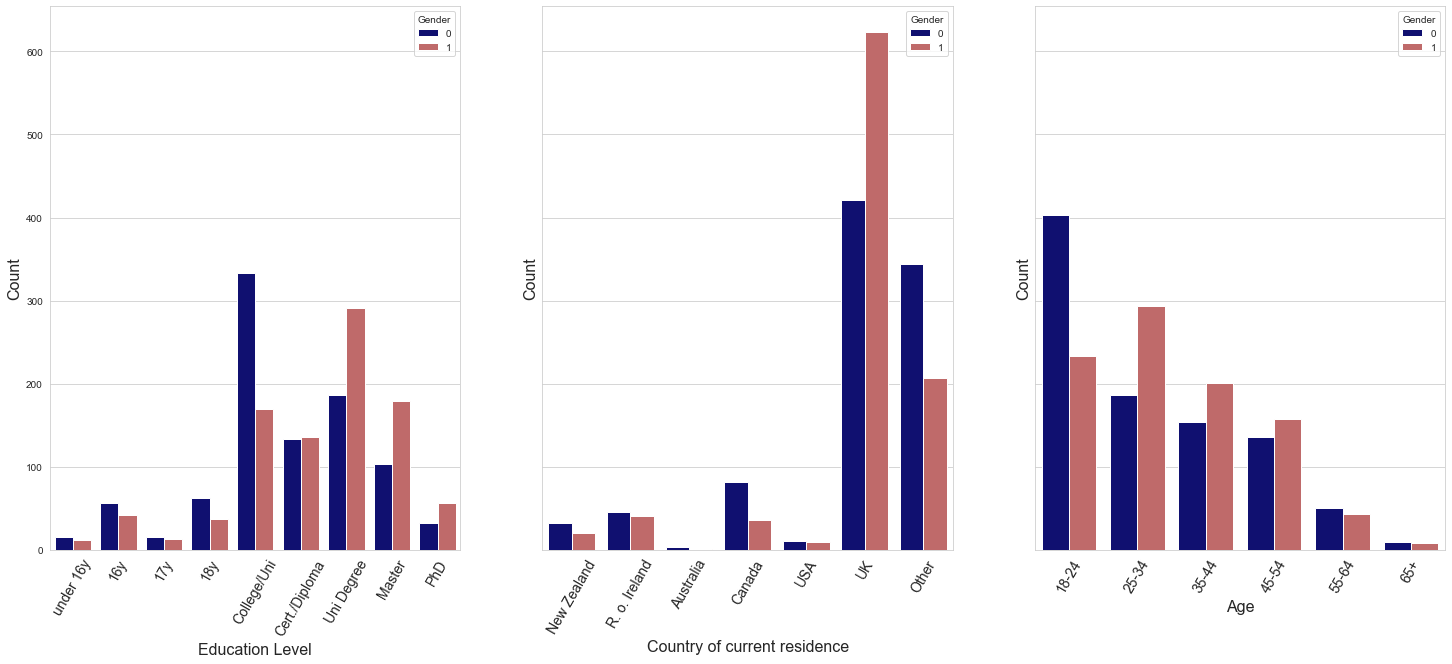

In [14]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(25, 10), sharey=True)

sns.set_palette(custom_palette_gender)

edu_order = ["under 16y", "16y", "17y", '18y', 'College/Uni', 'Cert./Diploma', 'Uni Degree', 'Master', 'PhD']
ethnicity_order = ["Asian", "Black", "Mixed-Black/Asian", "Mixed-White/Asian", "Mixed-White/Black", "Other", "White"]
age_order = ["18-24", "25-34", "35-44", '45-54', "55-64",'65+']
country_order = ["New Zealand", "R. o. Ireland", "Australia", "Canada", "USA", "UK", "Other"]

g = sns.countplot(data=df1, x="Education_Level", order = edu_order, hue='Gender', ax=axes[0])
g.set_xticklabels(edu_order, rotation=60, size = 14)
g.set_xlabel("Education Level",size=16)
g.set_ylabel("Count",size=16)

g1 = sns.countplot(data=df1, x="Country_Name", hue='Gender', ax=axes[1])
g1.set_xticklabels(country_order, rotation=60, size = 14)
g1.set_xlabel("Country of current residence",size=16)
g1.set_ylabel("Count",size=16)

g3 = sns.countplot(data=df1, x="Age_Cat", hue='Gender', ax=axes[2])
g3.set_xticklabels(age_order, rotation=60, size = 14)
g3.set_xlabel("Age",size=16)
g3.set_ylabel("Count",size=16);

### Overview of overall drug usage

A look at the amount of individuals who responded with the different classes of when they last used the drugs.  
As expected, for some drugs most individuals CL5 and CL6 (used in the last week/day), such as Caffeine, Alcohol and Chocolate, while for other drugs such as Crack, Heroin and Methadone, the majority of people have never taken the drugs.  
We split it between male (blue) and female (red), to see whether there was any big difference in drug consumption. What can be seen is that men tend to have consumed drugs more recently, and other than for alcohol, there are always more women who have never consumed the drug than men. 

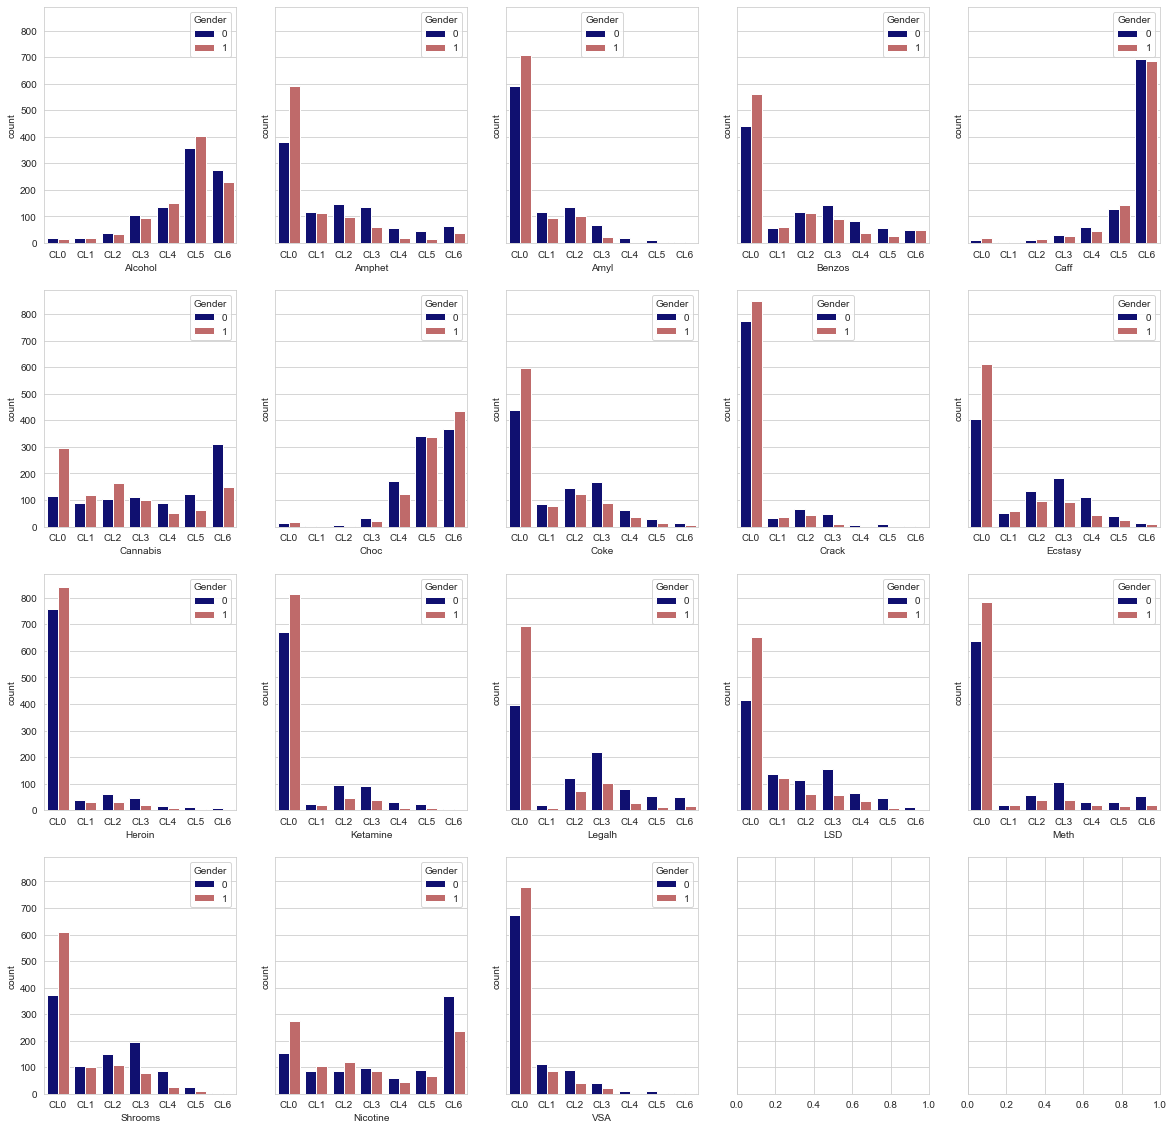

In [15]:
clsorder = ["CL0", "CL1", "CL2", "CL3", "CL4", "CL5", "CL6"]

f, axes = plt.subplots(4, 5, figsize=(20, 20), sharey=True)

sns.set_palette(custom_palette_gender)

sns.countplot(data=df1, x="Alcohol", order = clsorder, hue='Gender', ax=axes[0, 0])
sns.countplot(data=df1, x="Amphet", order = clsorder, hue='Gender', ax=axes[0, 1])
sns.countplot(data=df1, x="Amyl", order = clsorder, hue='Gender', ax=axes[0, 2])
sns.countplot(data=df1, x="Benzos", order = clsorder, hue='Gender', ax=axes[0, 3])
sns.countplot(data=df1, x="Caff", order = clsorder, hue='Gender', ax=axes[0, 4])
sns.countplot(data=df1, x="Cannabis", order = clsorder, hue='Gender', ax=axes[1, 0])
sns.countplot(data=df1, x="Choc", order = clsorder, hue='Gender', ax=axes[1, 1])
sns.countplot(data=df1, x="Coke", order = clsorder, hue='Gender', ax=axes[1, 2])
sns.countplot(data=df1, x="Crack", order = clsorder, hue='Gender', ax=axes[1, 3])
sns.countplot(data=df1, x="Ecstasy", order = clsorder, hue='Gender', ax=axes[1, 4])
sns.countplot(data=df1, x="Heroin", order = clsorder, hue='Gender', ax=axes[2, 0])
sns.countplot(data=df1, x="Ketamine", order = clsorder, hue='Gender', ax=axes[2, 1])
sns.countplot(data=df1, x="Legalh", order = clsorder, hue='Gender', ax=axes[2, 2])
sns.countplot(data=df1, x="LSD", order = clsorder, hue='Gender', ax=axes[2, 3])
sns.countplot(data=df1, x="Meth", order = clsorder, hue='Gender', ax=axes[2, 4])
sns.countplot(data=df1, x="Shrooms", order = clsorder, hue='Gender', ax=axes[3, 0])
sns.countplot(data=df1, x="Nicotine", order = clsorder, hue='Gender', ax=axes[3, 1])
sns.countplot(data=df1, x="VSA", order = clsorder, hue='Gender', ax=axes[3, 2]);

There are only 3 people in this data set who never consumed alcohol and never consumed chocolate and just 1 person never consumed any of the drugs in this study:

In [16]:
df1[(df1["Alcohol"] == "CL0") & (df1["Choc"] == "CL0")]

,ID,Age,Age_Cat,Gender,Education,Education_Level,Country,Country_Name,Ethnicity,Ethnicity_Label,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,VSA
330,333,1.82213,55-64,1,-1.22751,18y,0.24923,Canada,-0.31685,White,-0.46725,-0.43999,-1.55521,0.94156,0.75830,-1.37983,-1.54858,CL0,CL0,CL0,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL5,CL0
1277,1281,-0.95197,18-24,0,0.45468,Uni Degree,0.96082,UK,-0.50212,Asian,0.82562,0.63779,-0.84732,-2.21844,0.93949,1.86203,1.92173,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
1743,1747,0.49788,35-44,1,1.16365,Master,0.96082,UK,-1.10702,Black,-0.24649,-0.57545,-0.58331,0.13136,0.12331,-0.21712,-1.18084,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0


### Overview of personality traits 

The distribution of the personality traits were already standardized. 
We wanted to see whether there is any major difference between males and females, however, it is very similar. This is the reason of why we stacked the bars insted of plotting both (it was very hard to see anything).

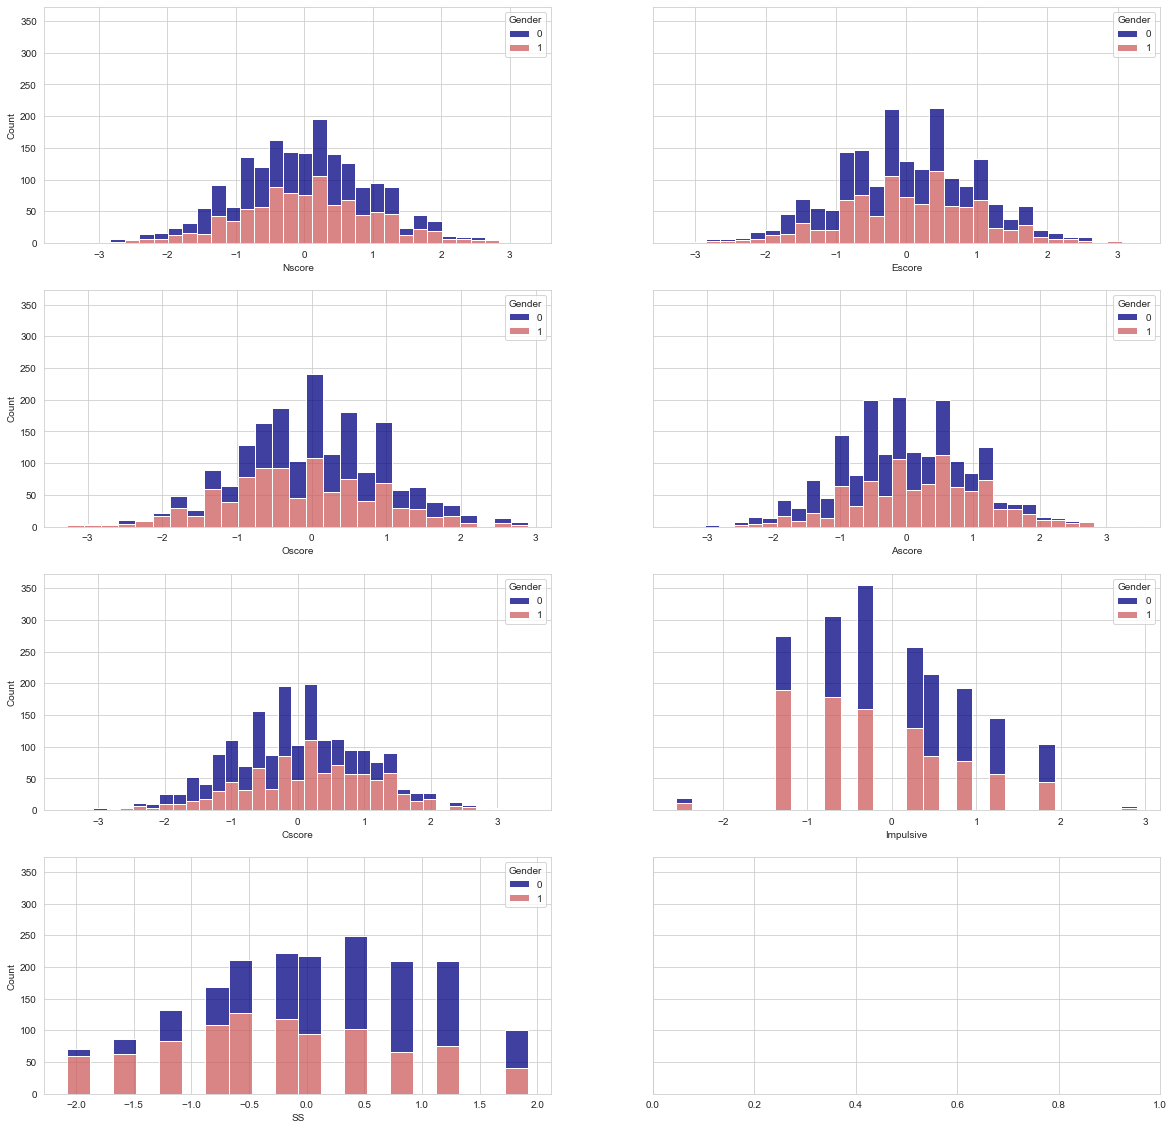

In [17]:
fig, axes = plt.subplots(ncols=2, nrows=4, figsize=(20, 20), sharey=True)
sns.set_palette(custom_palette_gender)

sns.histplot(data=df1, x="Nscore", hue='Gender', multiple="stack", ax=axes[0][0])
sns.histplot(data=df1, x="Escore", hue='Gender', multiple="stack", ax=axes[0][1])
sns.histplot(data=df1, x="Oscore", hue='Gender', multiple="stack", ax=axes[1][0])
sns.histplot(data=df1, x="Ascore", hue='Gender', multiple="stack", ax=axes[1][1])
sns.histplot(data=df1, x="Cscore", hue='Gender', multiple="stack", ax=axes[2][0])
sns.histplot(data=df1, x="Impulsive", hue='Gender', multiple="stack", ax=axes[2][1])
sns.histplot(data=df1, x="SS", hue='Gender', multiple="stack", ax=axes[3][0]);

## Classification of drug usage in users and non-users

Formally, the only individuals who can be considered non-users are individuals in CL0, however individuals who used a drug more than a decade ago cannot be considered a drug user for most applications.
There are several possible ways to discriminate participants into groups of users and non-users for binary classification. We decided to define non-user as anyone who has never taken the drug (CL0) or taken the drug over a decade ago (CL1) and anyone else as a user (CL2, CL3, CL4, CL5 and CL6).  
Anyone who has used the drug in the last decade will be categorized as "1" for that drug and "0" if they have never used the drug or used it over a decade ago.

In [18]:
drugs = ["Alcohol", "Amphet", "Amyl", "Benzos", "Caff", "Cannabis", "Choc", "Coke", "Crack",
        "Ecstasy", "Heroin", "Ketamine", "Legalh", "LSD", "Meth", "Shrooms", "Nicotine", "VSA"]

for element in drugs:
    column_insert = df1.columns.get_loc(element)+1
    col_name = element+"_Cat"
    cat = df1[element].apply(lambda x: 0 if (x == "CL0" or x == "CL1") else 1)
    df1.insert(column_insert, col_name, cat)
    df1[col_name] = df1[col_name].astype("category")

## Categorizing the different drugs into 3 groups

As dealing with 18 different drugs is a lot we decided to catgorize them into 3 groups depending on the percentage of "users". The classes we decided on are social/soft drugs, of which all expcept Cannabis are legal in all the countries the respondents reside in, party drugs and hard drugs.  
For the social/soft drugs over 60% of the individuals responded that that have used the drug in the last decade, for the party drugs between 60% and 25% have indicated usage of the drug and for the hard drugs less than 25%.

In [19]:
drugs_cat = ["Alcohol_Cat", "Amphet_Cat", "Amyl_Cat", "Benzos_Cat", "Caff_Cat", "Cannabis_Cat", "Choc_Cat", "Coke_Cat", "Crack_Cat",
        "Ecstasy_Cat", "Heroin_Cat", "Ketamine_Cat", "Legalh_Cat", "LSD_Cat", "Meth_Cat", "Shrooms_Cat", "Nicotine_Cat", "VSA_Cat"]

user_total = []
non_user_total = []

for element in drugs_cat:
    user = df1[element].value_counts(normalize=True).sort_index()[1]
    non_user = df1[element].value_counts(normalize=True).sort_index()[0]
    user_total.append(user)
    non_user_total.append(non_user)

total_user = pd.DataFrame([drugs_cat, user_total, non_user_total], index=["Drug", "User", "Non_user"]).T

In [20]:
print(total_user.query("User > 0.6"))
print(total_user.query("User < 0.6 and User > 0.25"))
print(total_user.query("User < 0.25"))

            Drug      User   Non_user
0    Alcohol_Cat  0.964305  0.0356953
4       Caff_Cat  0.980288  0.0197123
5   Cannabis_Cat  0.669686   0.330314
6       Choc_Cat  0.981886   0.018114
16  Nicotine_Cat  0.669153   0.330847
           Drug      User  Non_user
1    Amphet_Cat  0.359084  0.640916
3    Benzos_Cat  0.405967  0.594033
7      Coke_Cat  0.362813  0.637187
9   Ecstasy_Cat   0.39691   0.60309
12   Legalh_Cat   0.40277   0.59723
13      LSD_Cat  0.293554  0.706446
15  Shrooms_Cat   0.36601   0.63399
            Drug      User  Non_user
2       Amyl_Cat  0.196058  0.803942
8      Crack_Cat   0.10016   0.89984
10    Heroin_Cat  0.111348  0.888652
11  Ketamine_Cat  0.184337  0.815663
14      Meth_Cat  0.220565  0.779435
17       VSA_Cat  0.120405  0.879595


### Changing to binary classification for each of the drug groupings

We then proceeded to make an individual dataframe for each of the drug subrgoups:

In [21]:
df_group1_drugs = df1.drop(["Amphet_Cat", "Amyl_Cat", "Benzos_Cat", "Coke_Cat", "Crack_Cat", "Ecstasy_Cat", 'Heroin_Cat', 'Ketamine_Cat',
                       'Legalh_Cat', 'LSD_Cat', 'Meth_Cat', 'Shrooms_Cat', 'VSA_Cat', 'Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 
                       'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Shrooms',
                       'Nicotine', 'VSA'], axis=1)

df_group2_drugs = df1.drop(["Alcohol_Cat", "Amyl_Cat", "Caff_Cat", "Cannabis_Cat", "Choc_Cat", "Crack_Cat",
        "Heroin_Cat", "Ketamine_Cat", "Meth_Cat", "Nicotine_Cat", "VSA_Cat", "Alcohol", "Amphet", "Amyl", "Benzos", "Caff", "Cannabis", "Choc", "Coke", "Crack",
        "Ecstasy", "Heroin", "Ketamine", "Legalh", "LSD", "Meth", "Shrooms", "Nicotine", "VSA"], axis=1)

df_group3_drugs = df1.drop(["Alcohol_Cat", "Amphet_Cat", "Benzos_Cat", "Caff_Cat", "Cannabis_Cat", "Choc_Cat", "Coke_Cat",
        "Ecstasy_Cat", "Legalh_Cat", "LSD_Cat", "Shrooms_Cat", "Nicotine_Cat", "Alcohol", "Amphet", "Amyl", "Benzos", "Caff", "Cannabis", "Choc", "Coke", "Crack",
        "Ecstasy", "Heroin", "Ketamine", "Legalh", "LSD", "Meth", "Shrooms", "Nicotine", "VSA"], axis=1)

Changing the binary classification to integers for each of the drugs in the 3 drug subgroup dataframes:

In [22]:
df_group1_drugs["Alcohol_Cat"] = df_group1_drugs["Alcohol_Cat"].astype(int)
df_group1_drugs["Caff_Cat"] = df_group1_drugs["Caff_Cat"].astype(int)
df_group1_drugs["Cannabis_Cat"] = df_group1_drugs["Cannabis_Cat"].astype(int)
df_group1_drugs["Choc_Cat"] = df_group1_drugs["Choc_Cat"].astype(int)
df_group1_drugs["Nicotine_Cat"] = df_group1_drugs["Nicotine_Cat"].astype(int)

In [23]:
df_group2_drugs["Amphet_Cat"] = df_group2_drugs["Amphet_Cat"].astype(int)
df_group2_drugs["Benzos_Cat"] = df_group2_drugs["Benzos_Cat"].astype(int)
df_group2_drugs["Coke_Cat"] = df_group2_drugs["Coke_Cat"].astype(int)
df_group2_drugs["Ecstasy_Cat"] = df_group2_drugs["Ecstasy_Cat"].astype(int)
df_group2_drugs["Legalh_Cat"] = df_group2_drugs["Legalh_Cat"].astype(int)
df_group2_drugs["LSD_Cat"] = df_group2_drugs["LSD_Cat"].astype(int)
df_group2_drugs["Shrooms_Cat"] = df_group2_drugs["Shrooms_Cat"].astype(int)

In [24]:
df_group3_drugs["Amyl_Cat"] = df_group3_drugs["Amyl_Cat"].astype(int)
df_group3_drugs["Crack_Cat"] = df_group3_drugs["Crack_Cat"].astype(int)
df_group3_drugs["Heroin_Cat"] = df_group3_drugs["Heroin_Cat"].astype(int)
df_group3_drugs["Ketamine_Cat"] = df_group3_drugs["Ketamine_Cat"].astype(int)
df_group3_drugs["Meth_Cat"] = df_group3_drugs["Meth_Cat"].astype(int)
df_group3_drugs["VSA_Cat"] = df_group3_drugs["VSA_Cat"].astype(int)

Assigning user or non-user (1 or 0) for each of the drug groups and storing this in a few dataframe:

In [25]:
df2 = df1.copy()

In [26]:
drugs1=["Alcohol_Cat", "Caff_Cat", "Cannabis_Cat", "Choc_Cat", "Nicotine_Cat"]
df2['Group1_drugs']= df_group1_drugs["Alcohol_Cat"] + df_group1_drugs["Caff_Cat"] + df_group1_drugs["Cannabis_Cat"] + df_group1_drugs["Choc_Cat"] + df_group1_drugs["Nicotine_Cat"]
df2['Group1_drugs'] = df2['Group1_drugs'].apply(lambda x: 1 if x > 0 else 0)


In [27]:
drugs2=["Amphet_Cat", "Benzos_Cat", "Coke_Cat", "Ecstasy_Cat", "Legalh_Cat", "LSD_Cat", "Shrooms_Cat"]
df2['Group2_drugs']= df_group2_drugs["Amphet_Cat"] + df_group2_drugs["Benzos_Cat"] + df_group2_drugs["Coke_Cat"] + df_group2_drugs["Ecstasy_Cat"] + df_group2_drugs["Legalh_Cat"] + df_group2_drugs["LSD_Cat"]+ df_group2_drugs["Shrooms_Cat"]
df2['Group2_drugs'] = df2['Group2_drugs'].apply(lambda x: 1 if x > 0 else 0)


In [28]:
drugs3=["Amyl_Cat", "Crack_Cat", "Heroin_Cat", "Ketamine_Cat", "Meth_Cat", "VSA_Cat"]
df2['Group3_drugs']= df_group3_drugs["Amyl_Cat"] + df_group3_drugs["Crack_Cat"] + df_group3_drugs["Heroin_Cat"] + df_group3_drugs["Ketamine_Cat"] + df_group3_drugs["Meth_Cat"] + df_group3_drugs["VSA_Cat"]
df2['Group3_drugs'] = df2['Group3_drugs'].apply(lambda x: 1 if x > 0 else 0)

In [29]:
df2.drop(["Alcohol", "Amphet", "Amyl", "Benzos", "Caff", "Cannabis", "Choc", "Coke", "Crack","Ecstasy", "Heroin", "Ketamine",
          "Legalh", "LSD", "Meth", "Shrooms", "Nicotine", "VSA", "Alcohol_Cat", "Amphet_Cat", "Amyl_Cat", "Benzos_Cat", "Caff_Cat",
          "Cannabis_Cat", "Choc_Cat", "Coke_Cat", "Crack_Cat","Ecstasy_Cat", "Heroin_Cat", "Ketamine_Cat", "Legalh_Cat", "LSD_Cat", 
          "Meth_Cat", "Shrooms_Cat", "Nicotine_Cat", "VSA_Cat"], axis=1, inplace=True)

### Checking how balanced the groups are
Group 1 is very unbalanced, but we knew that, as everyone except one individual person has taken one of the drugs in the study.

In [30]:
df2["Group2_drugs"].value_counts(normalize=True).sort_index()

0    0.353756
1    0.646244
Name: Group2_drugs, dtype: float64

In [31]:
df2["Group3_drugs"].value_counts(normalize=True).sort_index()

0    0.546617
1    0.453383
Name: Group3_drugs, dtype: float64

## Correlation Heatmap to get an overview of how the data is correlated

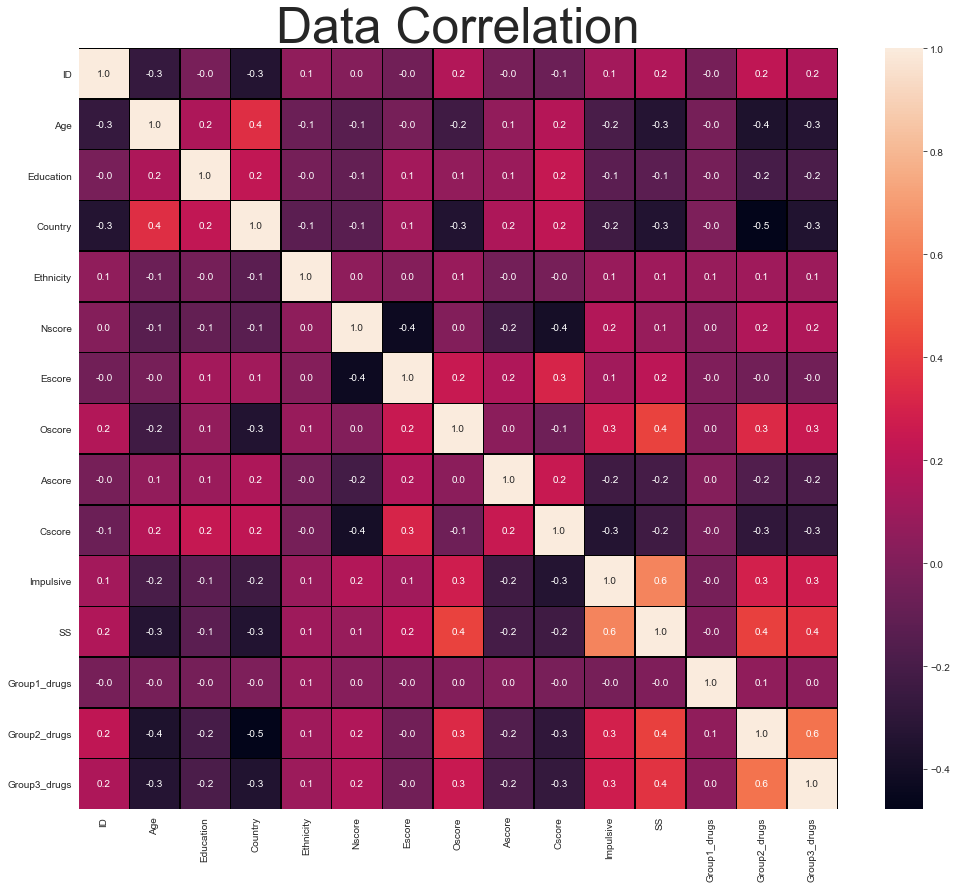

In [57]:
plt.subplots(figsize=(17,14))
sns.heatmap(df2.corr(),annot=True,linewidths=0.5,linecolor="Black",fmt="1.1f")
plt.title("Data Correlation",fontsize=50)
plt.show()

## Drug usage comparison in the UK and the USA

We are going to look at how drug consumption varies between the USA and the UK.   
We cannot include the other countries in this study as there are too few respondants from those countries (Australia 54, Canada 87, New Zealand 5, Republic or Ireland 20 and Other 118). We have 557 respondant from the USA which accounts to 29.55%, and 1044 respondants from the UK, accounting to 55.38%.  
As there are more respondants from the UK than the USA, hence we are going to compare percentages to make it easier to interpret.

In [32]:
df1_uk_usa = df1[(df1['Country_Name'].isin(['UK','USA']))]
df1_uk = df1[(df1['Country_Name'] == "UK")]
df1_usa = df1[(df1['Country_Name'] == "USA")]

In [33]:
drugs_cat = ["Alcohol_Cat", "Amphet_Cat", "Amyl_Cat", "Benzos_Cat", "Caff_Cat", "Cannabis_Cat", "Choc_Cat", "Coke_Cat", "Crack_Cat",
        "Ecstasy_Cat", "Heroin_Cat", "Ketamine_Cat", "Legalh_Cat", "LSD_Cat", "Meth_Cat", "Shrooms_Cat", "Nicotine_Cat", "VSA_Cat"]

uk_user_percentage = []
uk_non_user_percentage = []

for element in drugs_cat:
    user = df1_uk[element].value_counts(normalize=True).sort_index()[1]
    non_user = df1_uk[element].value_counts(normalize=True).sort_index()[0]
    uk_user_percentage.append(user)
    uk_non_user_percentage.append(non_user)

uk_user = pd.DataFrame([drugs_cat, uk_user_percentage, uk_non_user_percentage], index=["Drug", "User", "Non_user"]).T

In [34]:
drugs_cat = ["Alcohol_Cat", "Amphet_Cat", "Amyl_Cat", "Benzos_Cat", "Caff_Cat", "Cannabis_Cat", "Choc_Cat", "Coke_Cat", "Crack_Cat",
        "Ecstasy_Cat", "Heroin_Cat", "Ketamine_Cat", "Legalh_Cat", "LSD_Cat", "Meth_Cat", "Shrooms_Cat", "Nicotine_Cat", "VSA_Cat"]

usa_user_percentage = []
usa_non_user_percentage = []

for element in drugs_cat:
    user = df1_usa[element].value_counts(normalize=True).sort_index()[1]
    non_user = df1_usa[element].value_counts(normalize=True).sort_index()[0]
    usa_user_percentage.append(user)
    usa_non_user_percentage.append(non_user)

usa_user = pd.DataFrame([drugs_cat, usa_user_percentage, usa_non_user_percentage], index=["Drug", "User", "Non_user"]).T

<ipython-input-54-593a58640ac1>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(drugs, rotation=90, size = 12)
<ipython-input-54-593a58640ac1>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(drugs, rotation=90, size = 12)


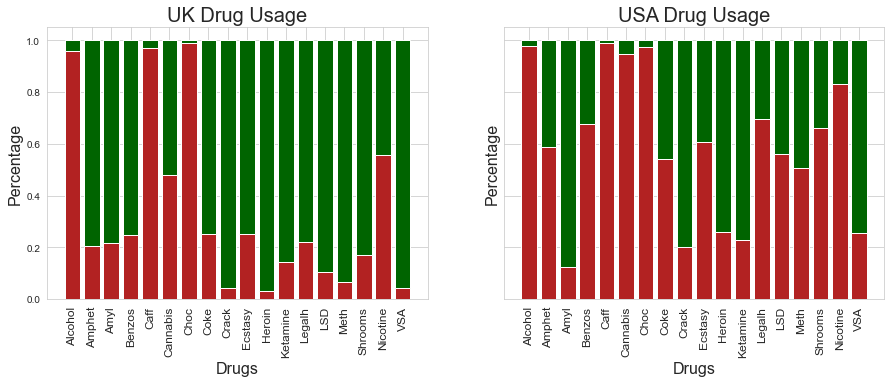

In [54]:
drugs_cat = ["Alcohol_Cat", "Amphet_Cat", "Amyl_Cat", "Benzos_Cat", "Caff_Cat", "Cannabis_Cat", "Choc_Cat", "Coke_Cat", "Crack_Cat",
        "Ecstasy_Cat", "Heroin_Cat", "Ketamine_Cat", "Legalh_Cat", "LSD_Cat", "Meth_Cat", "Shrooms_Cat", "Nicotine_Cat", "VSA_Cat"]

drugs = ["Alcohol", "Amphet", "Amyl", "Benzos", "Caff", "Cannabis", "Choc", "Coke", "Crack",
        "Ecstasy", "Heroin", "Ketamine", "Legalh", "LSD", "Meth", "Shrooms", "Nicotine", "VSA"]

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15, 5))

ax1.bar(uk_user["Drug"], uk_user["User"], color='firebrick', edgecolor='white')
ax1.bar(uk_user["Drug"], uk_user["Non_user"], bottom=uk_user["User"], color='darkgreen', edgecolor='white')
ax1.set_title('UK Drug Usage', size = 20)
ax1.set_xticklabels(drugs, rotation=90, size = 12)
ax1.set_xlabel("Drugs",size=16)
ax1.set_ylabel("Percentage",size=16)
;

ax2.bar(usa_user["Drug"], usa_user["User"], color='firebrick', edgecolor='white')
ax2.bar(usa_user["Drug"], usa_user["Non_user"], bottom=usa_user["User"], color='darkgreen', edgecolor='white')
ax2.set_title('USA Drug Usage', size = 20)
ax2.set_xticklabels(drugs, rotation=90, size = 12)
ax2.set_xlabel("Drugs",size=16)
ax2.set_ylabel("Percentage",size=16);

It can clearly be seen that for nearly any drug the US has a higher percentage of users compared to non-users. Especially for the hard drugs, the US has a higher usage percentage.  
Cannabis: it makes sense than the US has a higher percentage of users as it is legal in some US states, while it is not in the UK


## Distribution of personality traits depending on drug use

Next we wanted to see how the the personality traits varies between users an non-users of the different groups of drugs: soft/social drugs, party drugs and hard drugs.  
The plots for group 1 are not reliable/do not tell us anything, as the grop of individuals who class as non-users is too little to make any real conclusions from the data. 

In [36]:
custom_palette_drugs = ["darkgreen", "firebrick"]

### Distribution of Nscores - Neuroticism

Neuroticism is a long-term tendancy to experience negative emotions such as nervousness, tension, anxiety and depression.  
A high N score is also associared with many other addictions like Internet addiction, exercise addiction, compuslive buying, and study addiction.

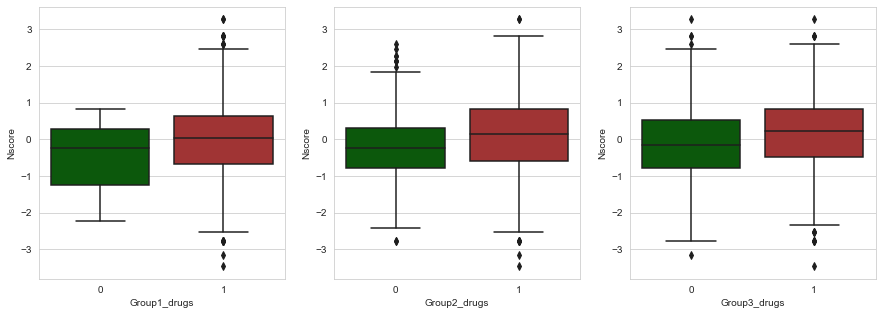

In [37]:
f, axes = plt.subplots(1,3, figsize=(15,5))
sns.set_palette(custom_palette_drugs)

sns.boxplot(y="Nscore", x="Group1_drugs" , data=df2, ax=axes[0])
sns.boxplot(y="Nscore", x="Group2_drugs" , data=df2, ax=axes[1])
sns.boxplot(y="Nscore", x="Group3_drugs" , data=df2, ax=axes[2]);

### Distribution of Escores - Extraversion

Extraversion is manifested in outgoing, warm, active, assertive, talkative, cheerful and in search of stimulation characteristics.

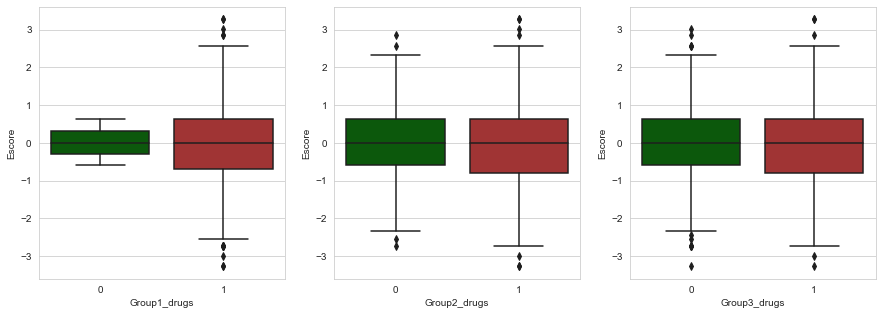

In [38]:
f, axes = plt.subplots(1,3, figsize=(15,5))
sns.set_palette(custom_palette_drugs)

sns.boxplot(y="Escore", x="Group1_drugs" , data=df2, ax=axes[0])
sns.boxplot(y="Escore", x="Group2_drugs" , data=df2, ax=axes[1])
sns.boxplot(y="Escore", x="Group3_drugs" , data=df2, ax=axes[2]);

### Distribution of Oscores - Openess to Experience

Openess to experience is a general appreciation for art, unusual ideas, and imaginative, ereative, unconventional and wide interests.

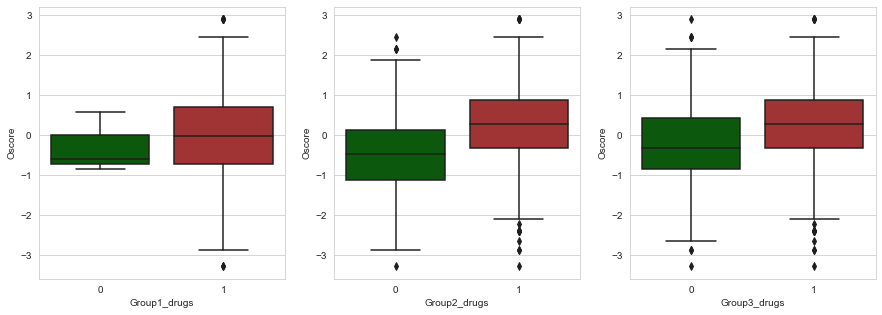

In [39]:
f, axes = plt.subplots(1,3, figsize=(15,5))
sns.set_palette(custom_palette_drugs)

sns.boxplot(y="Oscore", x="Group1_drugs" , data=df2, ax=axes[0])
sns.boxplot(y="Oscore", x="Group2_drugs" , data=df2, ax=axes[1])
sns.boxplot(y="Oscore", x="Group3_drugs" , data=df2, ax=axes[2]);

### Distribution of Ascores - Agreeableness

Agreeableness is a dimension of interpersonal relations, characterized by altriusm, trust, modesty, kindness, compassion and cooperativeness.

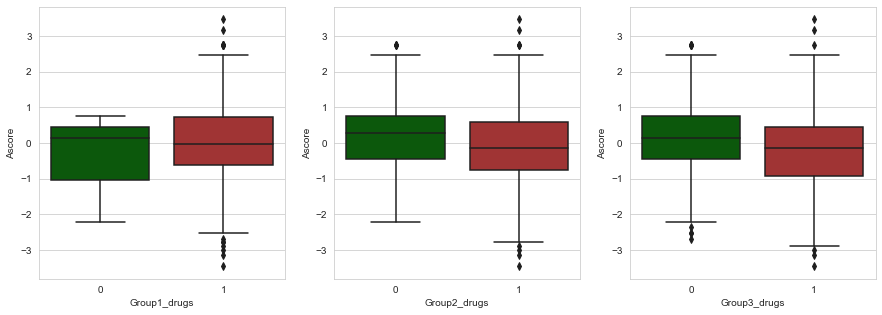

In [40]:
f, axes = plt.subplots(1,3, figsize=(15,5))
sns.set_palette(custom_palette_drugs)

sns.boxplot(y="Ascore", x="Group1_drugs" , data=df2, ax=axes[0])
sns.boxplot(y="Ascore", x="Group2_drugs" , data=df2, ax=axes[1])
sns.boxplot(y="Ascore", x="Group3_drugs" , data=df2, ax=axes[2]);

### Distribution of Cscores - Conscientiousness

Conscientiousness is a tendancy to be organised and dependable, strong-willing, persistentm reliable and efficient.

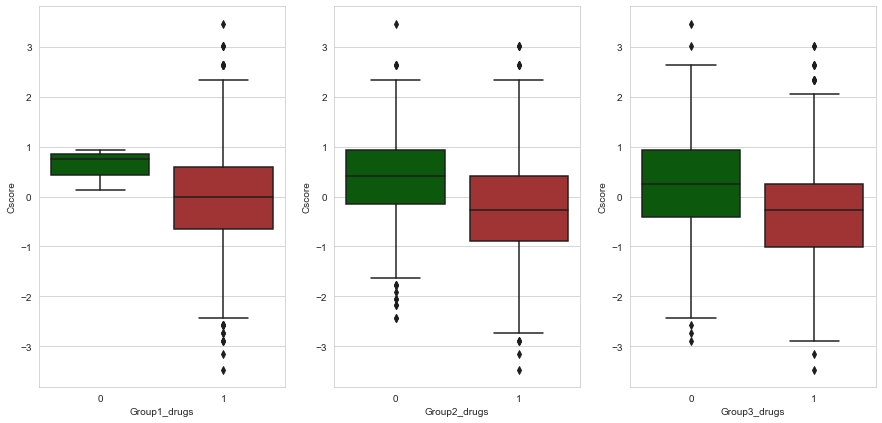

In [41]:
f, axes = plt.subplots(1,3, figsize=(15,7))
sns.set_palette(custom_palette_drugs)

sns.boxplot(y="Cscore", x="Group1_drugs" , data=df2, ax=axes[0])
sns.boxplot(y="Cscore", x="Group2_drugs" , data=df2, ax=axes[1])
sns.boxplot(y="Cscore", x="Group3_drugs" , data=df2, ax=axes[2]);

### Distribution of Impulsiveness 

Impulsiveness was measured using the Barratt Impulsiveness Scale (BIS-11), which measures the behavioural contruct of implusiveness, and comprises thmree subscales: motor impulsiveness, attentional impulsiveness, and non-planning. The ‘motor’ aspect reflects acting without thinking, the ‘attentional’ component poor concentration and thought intrusions, and the ‘non-planning’ a lack of consideration for consequences. 

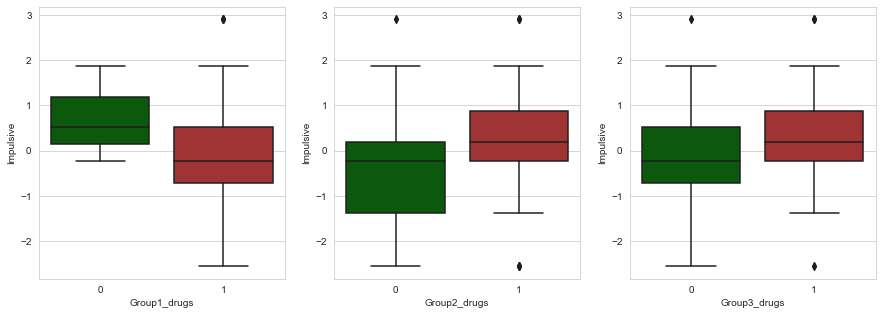

In [42]:
f, axes = plt.subplots(1,3, figsize=(15,5))
sns.set_palette(custom_palette_drugs)

sns.boxplot(y="Impulsive", x="Group1_drugs" , data=df2, ax=axes[0])
sns.boxplot(y="Impulsive", x="Group2_drugs" , data=df2, ax=axes[1])
sns.boxplot(y="Impulsive", x="Group3_drugs" , data=df2, ax=axes[2]);

### Distribution of Sensation seeking

Sensation seeking was measured using the impulsivity Sensation-Seeking scale (ImpSS). The ImpSS combines the traits of impulsivity and sensation-seeking, it is regarded as a measure of a general sensation-seeking trait. It is considered a valid
and reliable measure of high risk behavioural correlates such as, substance misuse.

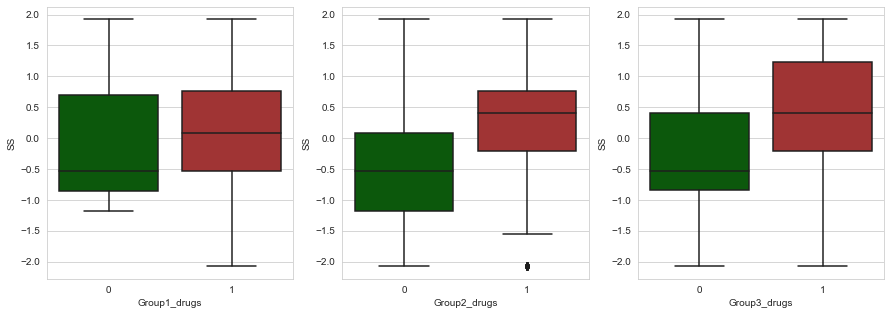

In [43]:
f, axes = plt.subplots(1,3, figsize=(15,5))
sns.set_palette(custom_palette_drugs)

sns.boxplot(y="SS", x="Group1_drugs" , data=df2, ax=axes[0])
sns.boxplot(y="SS", x="Group2_drugs" , data=df2, ax=axes[1])
sns.boxplot(y="SS", x="Group3_drugs" , data=df2, ax=axes[2]);

***Adjusted figures for presentation***

*All plots for party drugs in one*

[(-3.8, 3.8)]

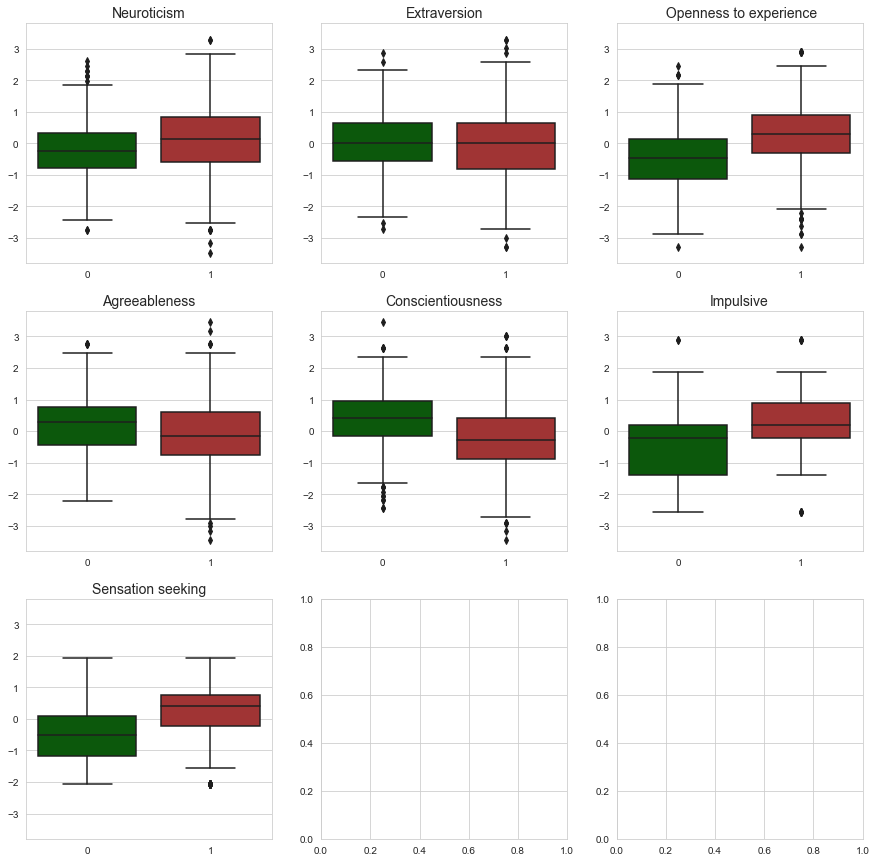

In [44]:
f, axes = plt.subplots(3,3, figsize=(15,15))
sns.set_palette(custom_palette_drugs) 

N = sns.boxplot(y="Nscore", x="Group2_drugs" , data=df2, ax=axes[0][0])
N.set_xlabel("")
N.set_ylabel("")
N.set_title("Neuroticism", size=14)
N.set(ylim=(-3.8, 3.8))

E = sns.boxplot(y="Escore", x="Group2_drugs" , data=df2, ax=axes[0][1])
E.set_xlabel("")
E.set_ylabel("")
E.set_title("Extraversion", size=14)
E.set(ylim=(-3.8, 3.8))

O = sns.boxplot(y="Oscore", x="Group2_drugs" , data=df2, ax=axes[0][2])
O.set_xlabel("")
O.set_ylabel("")
O.set_title(" Openness to experience", size=14)
O.set(ylim=(-3.8, 3.8))

A = sns.boxplot(y="Ascore", x="Group2_drugs" , data=df2, ax=axes[1][0])
A.set_xlabel("")
A.set_ylabel("")
A.set_title("Agreeableness", size=14)
A.set(ylim=(-3.8, 3.8))

C = sns.boxplot(y="Cscore", x="Group2_drugs" , data=df2, ax=axes[1][1])
C.set_xlabel("")
C.set_ylabel("")
C.set_title("Conscientiousness", size=14)
C.set(ylim=(-3.8, 3.8))

Imp = sns.boxplot(y="Impulsive", x="Group2_drugs" , data=df2, ax=axes[1][2])
Imp.set_xlabel("")
Imp.set_ylabel("")
Imp.set_title("Impulsive", size=14)
Imp.set(ylim=(-3.8, 3.8))

SS = sns.boxplot(y="SS", x="Group2_drugs" , data=df2, ax=axes[2][0])
SS.set_xlabel("")
SS.set_ylabel("")
SS.set_title("Sensation seeking", size=14)
SS.set(ylim=(-3.8, 3.8))

*Just party drugs boxplots of interest for presentation*

[(-3.8, 3.8)]

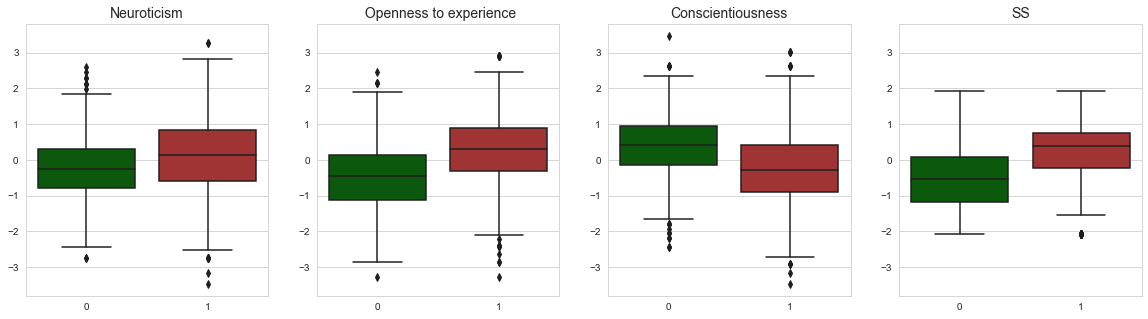

In [45]:
f, axes = plt.subplots(1,4, figsize=(20,5))
sns.set_palette(custom_palette_drugs) 

N = sns.boxplot(y="Nscore", x="Group2_drugs" , data=df2, ax=axes[0])
N.set_xlabel("")
N.set_ylabel("")
N.set_title("Neuroticism", size=14)
N.set(ylim=(-3.8, 3.8))

O = sns.boxplot(y="Oscore", x="Group2_drugs" , data=df2, ax=axes[1])
O.set_xlabel("")
O.set_ylabel("")
O.set_title(" Openness to experience", size=14)
O.set(ylim=(-3.8, 3.8))

C = sns.boxplot(y="Cscore", x="Group2_drugs" , data=df2, ax=axes[2])
C.set_xlabel("")
C.set_ylabel("")
C.set_title("Conscientiousness", size=14)
C.set(ylim=(-3.8, 3.8))

SS = sns.boxplot(y="SS", x="Group2_drugs" , data=df2, ax=axes[3])
SS.set_xlabel("")
SS.set_ylabel("")
SS.set_title("SS", size=14)
SS.set(ylim=(-3.8, 3.8))

## Drug users depending on level of Further Education

Next we wanted to see whether the percentage of users differes between individuals with different levels of education. We once again used percentages instead of counting the individuals as the respondants were not equally spread across the different levels of education. 

In [46]:
df3 = df2[["Education_Level", "Group2_drugs", "Group3_drugs"]].copy()
crosstab_2 = pd.crosstab(df3["Education_Level"],[df3["Group2_drugs"]])
crosstab_3 = pd.crosstab(df3["Education_Level"],[df3["Group3_drugs"]])
edu_crosstab = pd.merge(crosstab_2, crosstab_3, on=["Education_Level"], suffixes=["group2", "group3"])

#Make users to percenatges of total amount of people in that level of education category
edu_crosstab["1group2"]= edu_crosstab["1group2"].div(edu_crosstab["1group2"]+edu_crosstab["0group2"]).multiply(100)
edu_crosstab["1group3"]= edu_crosstab["1group3"].div(edu_crosstab["1group3"]+edu_crosstab["0group3"]).multiply(100)

edu_crosstab.drop(["0group2", "0group3"], axis=1, inplace=True)
edu_crosstab.reset_index(level=0, inplace=True)

edu_crosstab.rename(columns={"1group2": "Party_drugs", "1group3": "Hard_drugs"}, inplace=True)

In [47]:
tidy_edu = edu_crosstab.melt(id_vars='Education_Level').rename(columns=str.title)

In [48]:
custom_palette_2_3 = ["lightcoral", "maroon"]

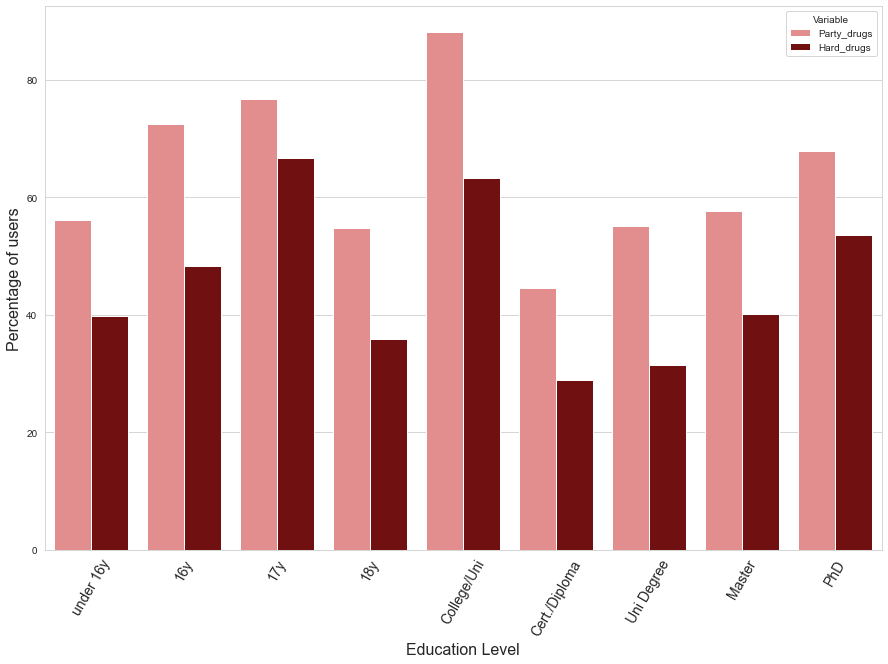

In [53]:
edu_order = ["under 16y", "16y", "17y", '18y', 'College/Uni', 'Cert./Diploma', 'Uni Degree', 'Master', 'PhD']

fig, ax1 = plt.subplots(figsize=(15, 10))
sns.set_palette(custom_palette_2_3)

g = sns.barplot(x='Education_Level', y="Value", hue='Variable', data=tidy_edu);
g.set_xticklabels(edu_order, rotation=60, size = 14)
g.set_xlabel("Education Level",size=16)
g.set_ylabel("Percentage of users",size=16);

No clear trend can be seen when looking at the drug usage of individuals with different levels of education. Individuals who are still at university/college or started university/college but never graduated with any qualification have the highest percentage of users compared no non-users.  

## Drug users depending on Age

Same as with the level of education, we wanted to see whether the percenatage of users varies between the different age groups. As above, the respondants weren't equally spread across the different groups, so percentages were used. 

In [50]:
df4 = df2[["Age_Cat", "Group2_drugs", "Group3_drugs"]].copy()
crosstab_2 = pd.crosstab(df4["Age_Cat"],[df3["Group2_drugs"]])
crosstab_3 = pd.crosstab(df4["Age_Cat"],[df3["Group3_drugs"]])
age_crosstab = pd.merge(crosstab_2, crosstab_3, on=["Age_Cat"], suffixes=["group2", "group3"])
#Make users to percenatges of total amount of people in that level of education category
age_crosstab["1group2"]= age_crosstab["1group2"].div(age_crosstab["1group2"]+age_crosstab["0group2"]).multiply(100)
age_crosstab["1group3"]= age_crosstab["1group3"].div(age_crosstab["1group3"]+age_crosstab["0group3"]).multiply(100)

age_crosstab.drop(["0group2", "0group3"], axis=1, inplace=True)
age_crosstab.reset_index(level=0, inplace=True)

age_crosstab.rename(columns={"1group2": "Party_drugs", "1group3": "Hard_drugs"}, inplace=True)

In [51]:
tidy_age = age_crosstab.melt(id_vars='Age_Cat').rename(columns=str.title)

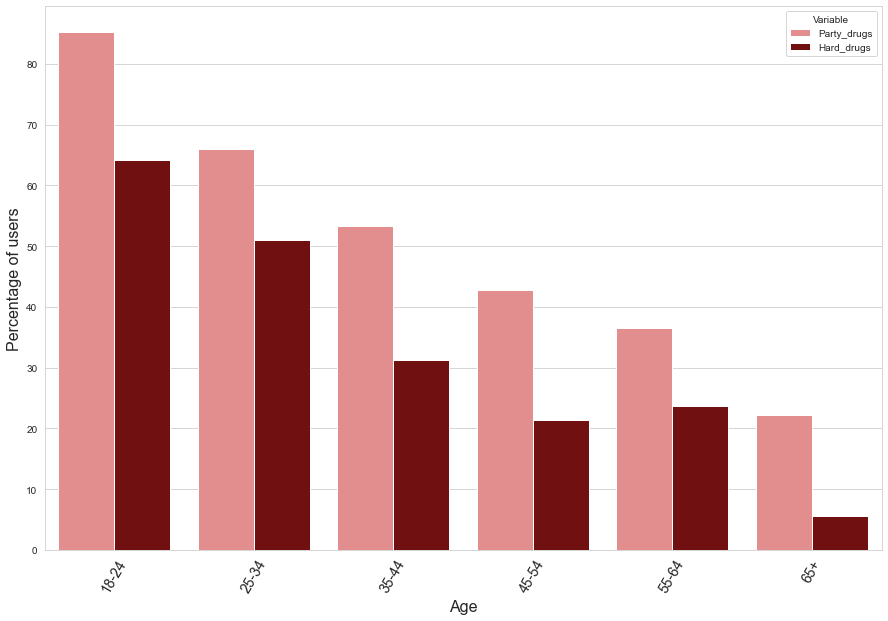

In [52]:
age_order = ["18-24", "25-34", "35-44", '45-54', "55-64",'65+']

fig, ax1 = plt.subplots(figsize=(15, 10))
sns.set_palette(custom_palette_2_3)

g = sns.barplot(x='Age_Cat', y="Value", hue='Variable', data=tidy_age);
g.set_xticklabels(age_order, rotation=60, size = 14)
g.set_xlabel("Age",size=16)
g.set_ylabel("Percentage of users",size=16);

A clear difference can be seen - the younger age groups have a higher percentage of drug users, for which there could be numerous different explantions.  
One explanation could be that more of the individuals in the older age groups may have also taken the drugs when they were younger, however that is more than a decade ago and therefore the individuals would classifiy as non-users. Another reason is the generational difference, that drug usage is more widely spread in the younger generations and more socially acceptable than maybe in the younger generations. Furthermore, many of the younger individuals, are still at university, where the drug culture tends to be a lot higher. 

## Further things to look into:

1. As mentioned above to clear trend can be seen when looking at the percentage users with different levels of education. What would be interesting to see is the combination of the age and level of education factor. For exmaple: anyone with a PhD tends to be slightly older, as it takes many year to achieve this level of education. How to people with a PhD compare to the average in their age group in terms of frugs usage?  

2. Look more into the individual drugs itself and not only the three different goups of drugs. Maybe there are certain individual drugs that are very popular in different age groups or with people of a certain level of education.